<a href="https://colab.research.google.com/github/LuisSeabra/MVP_analise_dados/blob/main/C%C3%B3pia_de_membros_PIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

In [166]:
import chardet

# Detectar a codificação do arquivo
with open("membros_FINAL.csv", 'rb') as f:
    result = chardet.detect(f.read())
    print(result)  # Mostra a codificação e a confiança


{'encoding': 'ISO-8859-1', 'confidence': 0.7288837649571612, 'language': ''}


In [167]:
import pandas as pd

# Tentar carregar o arquivo, ignorando as linhas problemáticas
membros_data = pd.read_csv("membros_FINAL.csv", encoding='latin1', sep=',', on_bad_lines='skip')

# Verificar as primeiras linhas do arquivo
print(membros_data.head())


  Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD
0  MIRELA TRINDADE DA COSTA;27/07/2013;11;;BATISM...
1  GUILHERME DA SILVA SAO PEDRO;31/05/2013;11;SOL...
2  LORENA PORTO DOS SANTOS;19/03/2013;11;SOLTEIR0...
3  ZIEDEER ARTHUR DA SILVA CHING SAN;10/02/2013;1...
4  JOAO PEDRO ROSA PIRES HENRIQUES;06/12/2011;12;...


In [168]:
import pandas as pd
import csv

# Função para limpar o arquivo CSV
def clean_csv(input_file, output_file):
    with open(input_file, 'r', encoding='latin1') as infile, open(output_file, 'w', newline='', encoding='utf-8') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        # Identifica a quantidade correta de colunas pela primeira linha (cabeçalho)
        headers = next(reader)
        writer.writerow(headers)
        num_columns = len(headers)

        # Lê e limpa as demais linhas
        for row in reader:
            if len(row) == num_columns:  # Mantém apenas linhas com o número correto de colunas
                writer.writerow(row)
            else:
                # Pode implementar lógica adicional para tratar as linhas problemáticas
                print(f"Linha problemática ignorada: {row}")

# Caminho do arquivo de entrada e de saída
input_file = 'membros_FINAL.csv'  # Nome do arquivo CSV original
output_file = 'membros_FINAL_cleaned.csv'  # Nome do arquivo CSV limpo

# Limpar o arquivo
clean_csv(input_file, output_file)

# Carregar o arquivo limpo no pandas
membros_data_cleaned = pd.read_csv(output_file, encoding='utf-8')

# Verificar as primeiras linhas do arquivo limpo
print(membros_data_cleaned.head())


  Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD
0  MIRELA TRINDADE DA COSTA;27/07/2013;11;;BATISM...
1  GUILHERME DA SILVA SAO PEDRO;31/05/2013;11;SOL...
2  LORENA PORTO DOS SANTOS;19/03/2013;11;SOLTEIR0...
3  ZIEDEER ARTHUR DA SILVA CHING SAN;10/02/2013;1...
4  JOAO PEDRO ROSA PIRES HENRIQUES;06/12/2011;12;...


In [169]:
import pandas as pd

# Suponha que o caminho seja 'C:/caminho/para/membros_FINAL_cleaned.csv'
df_membros = pd.read_csv('/content/membros_FINAL_cleaned.csv')


In [170]:
import pandas as pd

# Carregar o arquivo CSV em um DataFrame
df_membros = pd.read_csv('membros_FINAL_cleaned.csv')

# Exibir as primeiras linhas do DataFrame
print(df_membros.head())


  Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD
0  MIRELA TRINDADE DA COSTA;27/07/2013;11;;BATISM...
1  GUILHERME DA SILVA SAO PEDRO;31/05/2013;11;SOL...
2  LORENA PORTO DOS SANTOS;19/03/2013;11;SOLTEIR0...
3  ZIEDEER ARTHUR DA SILVA CHING SAN;10/02/2013;1...
4  JOAO PEDRO ROSA PIRES HENRIQUES;06/12/2011;12;...


In [171]:
# Exibir as primeiras 5 linhas do DataFrame
print(df_membros.head())


  Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD
0  MIRELA TRINDADE DA COSTA;27/07/2013;11;;BATISM...
1  GUILHERME DA SILVA SAO PEDRO;31/05/2013;11;SOL...
2  LORENA PORTO DOS SANTOS;19/03/2013;11;SOLTEIR0...
3  ZIEDEER ARTHUR DA SILVA CHING SAN;10/02/2013;1...
4  JOAO PEDRO ROSA PIRES HENRIQUES;06/12/2011;12;...


In [172]:
print(df_membros.columns)


Index(['Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD'], dtype='object')


In [173]:
# Remover espaços em branco dos nomes das colunas
df_membros.columns = df_membros.columns.str.strip()

# Tentar novamente com o nome corrigido
print(df_membros.columns)


Index(['Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD'], dtype='object')


In [174]:
# Remover espaços em branco ou caracteres extras dos nomes das colunas
df_membros.columns = df_membros.columns.str.strip()

# Listar colunas novamente
print(df_membros.columns)


Index(['Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD'], dtype='object')


In [175]:
# Listar todas as colunas do DataFrame
print(df_membros.columns)


Index(['Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD'], dtype='object')


In [176]:
# Remover espaços em branco dos nomes das colunas
df_membros.columns = df_membros.columns.str.strip()


In [177]:
# Verificar se a coluna MODO_ENT realmente existe
if 'MODO_ENT' in df_membros.columns:
    print("A coluna MODO_ENT existe.")
    print(df_membros['MODO_ENT'].head())  # Exibir as primeiras linhas da coluna
else:
    print("A coluna MODO_ENT não existe.")


A coluna MODO_ENT não existe.


In [178]:
# Listar todas as colunas do DataFrame
print(df_membros.columns)


Index(['Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD'], dtype='object')


In [179]:
import pandas as pd

# Ler o arquivo novamente, especificando o delimitador
df_membros = pd.read_csv('membros_FINAL_cleaned.csv', sep=';')

# Verificar as colunas novamente
print(df_membros.columns)


Index(['Nome', 'NASC', 'IDADE', 'ESTADO_CIVIL', 'MODO_ENT', 'ENDERECO', 'EBD'], dtype='object')


In [180]:
# Exibir as primeiras 5 linhas da coluna MODO_ENT
print(df_membros['MODO_ENT'].head())


0          BATISMO
1        ACLAMAÇAO
2    RECONCILIAÇAO
3    RECONCILIAÇAO
4              NaN
Name: MODO_ENT, dtype: object


In [181]:
# Listar todas as colunas do DataFrame
print(df_membros.columns)


Index(['Nome', 'NASC', 'IDADE', 'ESTADO_CIVIL', 'MODO_ENT', 'ENDERECO', 'EBD'], dtype='object')


In [182]:
# Contar a frequência de cada valor na coluna 'MODO_ENT'
modo_ent_contagem = df_membros['MODO_ENT'].value_counts()


In [183]:
print(df_membros.columns)


Index(['Nome', 'NASC', 'IDADE', 'ESTADO_CIVIL', 'MODO_ENT', 'ENDERECO', 'EBD'], dtype='object')


In [184]:
df_membros.columns = df_membros.columns.str.strip()


In [185]:
# Listar os nomes das colunas para garantir que 'MODO_ENT' está presente
print(df_membros.columns)


Index(['Nome', 'NASC', 'IDADE', 'ESTADO_CIVIL', 'MODO_ENT', 'ENDERECO', 'EBD'], dtype='object')


In [186]:
# Tentar carregar o arquivo com uma codificação diferente
df_membros = pd.read_csv('membros_FINAL_cleaned.csv', encoding='utf-8')


In [187]:
# Tentar carregar o arquivo com uma codificação diferente
df_membros = pd.read_csv('membros_FINAL_cleaned.csv', encoding='utf-8')


In [188]:
# Especificar o separador como ponto e vírgula (;) se necessário
df_membros = pd.read_csv('membros_FINAL_cleaned.csv', sep=',')


In [189]:
# Limpar espaços extras nos nomes das colunas
df_membros.columns = df_membros.columns.str.strip()


In [190]:
import pandas as pd
import matplotlib.pyplot as plt

In [191]:
# Carregar o arquivo CSV
df_membros = pd.read_csv('membros_FINAL_cleaned.csv', encoding='utf-8')

In [192]:
# Verificar os nomes das colunas
print(df_membros.columns)

Index(['Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD'], dtype='object')


In [193]:
# Limpar espaços extras nos nomes das colunas, se necessário
df_membros.columns = df_membros.columns.str.strip()

In [194]:
df = pd.read_csv('/content/membros_FINAL_cleaned.csv')


In [196]:
import pandas as pd

# Carregando o DataFrame com o delimitador correto
df = pd.read_csv('/content/membros_FINAL_cleaned.csv', delimiter=';')

# Verificando as colunas
print(df.columns)


Index(['Nome', 'NASC', 'IDADE', 'ESTADO_CIVIL', 'MODO_ENT', 'ENDERECO', 'EBD'], dtype='object')


In [197]:
print(df.columns)


Index(['Nome', 'NASC', 'IDADE', 'ESTADO_CIVIL', 'MODO_ENT', 'ENDERECO', 'EBD'], dtype='object')


In [198]:
# Remover espaços em branco nos nomes das colunas
df.columns = df.columns.str.strip()


Index(['Nome', 'NASC', 'IDADE', 'ESTADO_CIVIL', 'MODO_ENT', 'ENDERECO', 'EBD'], dtype='object')


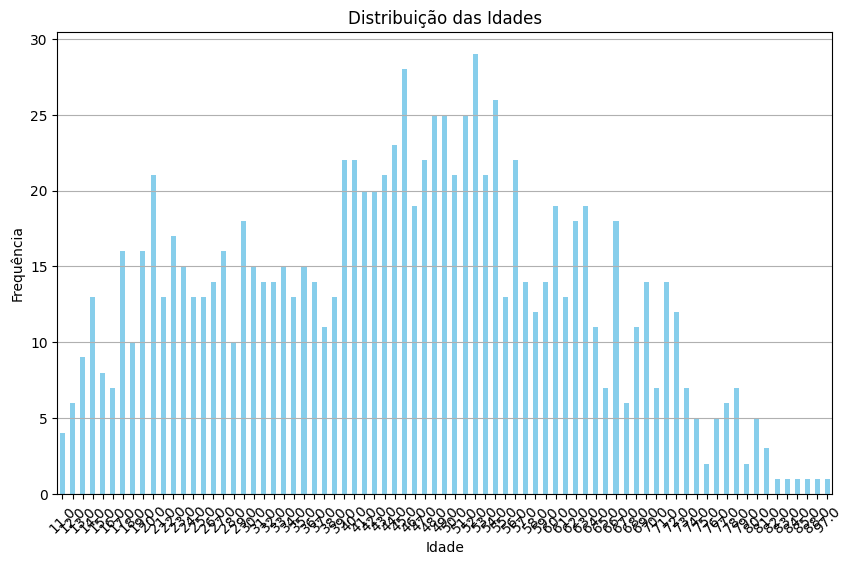

In [199]:
import matplotlib.pyplot as plt

# Verificando se a coluna IDADE agora existe
print(df.columns)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
df['IDADE'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x
plt.grid(axis='y')

plt.show()


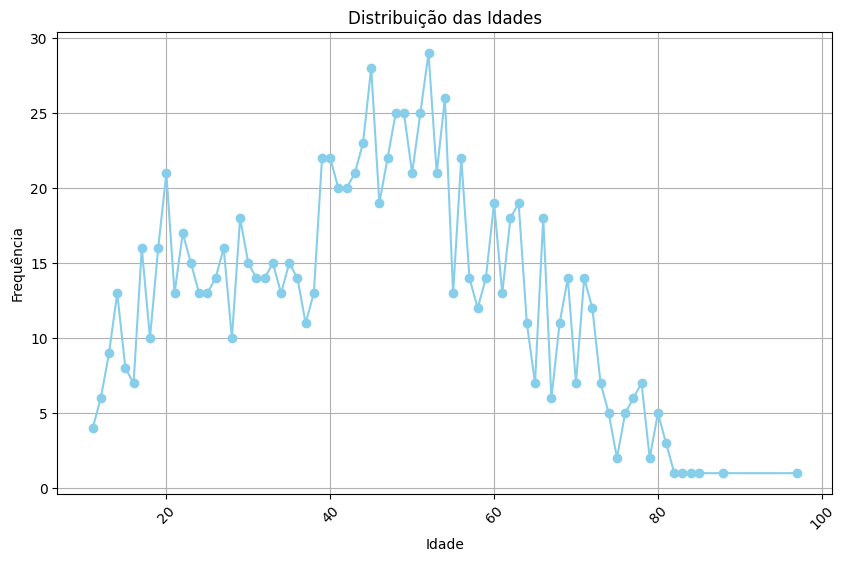

In [200]:
# Contar a frequência das idades
idade_counts = df['IDADE'].value_counts().sort_index()

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(idade_counts.index, idade_counts.values, marker='o', color='skyblue')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x
plt.grid()

plt.show()


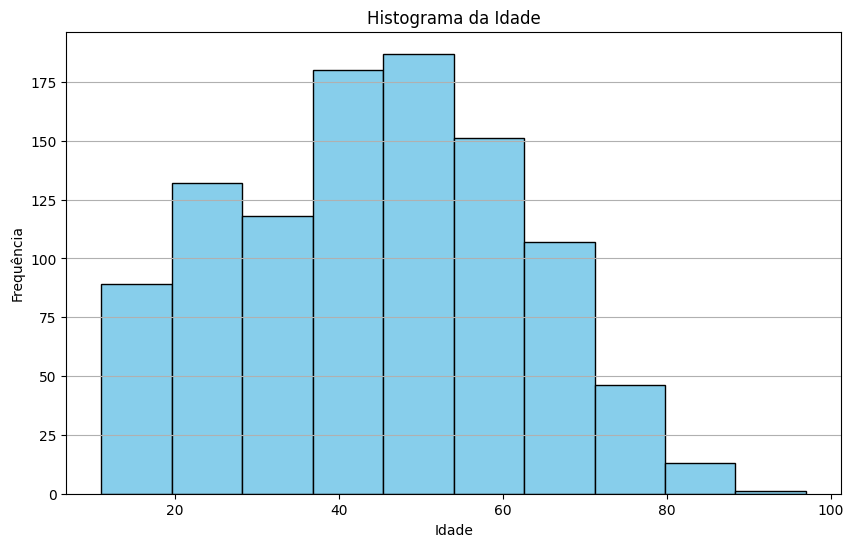

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o DataFrame com o delimitador correto
df = pd.read_csv('/content/membros_FINAL_cleaned.csv', delimiter=';')

# Remover espaços em branco nos nomes das colunas
df.columns = df.columns.str.strip()

# Plotando o histograma
plt.figure(figsize=(10, 6))
plt.hist(df['IDADE'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y')

plt.show()


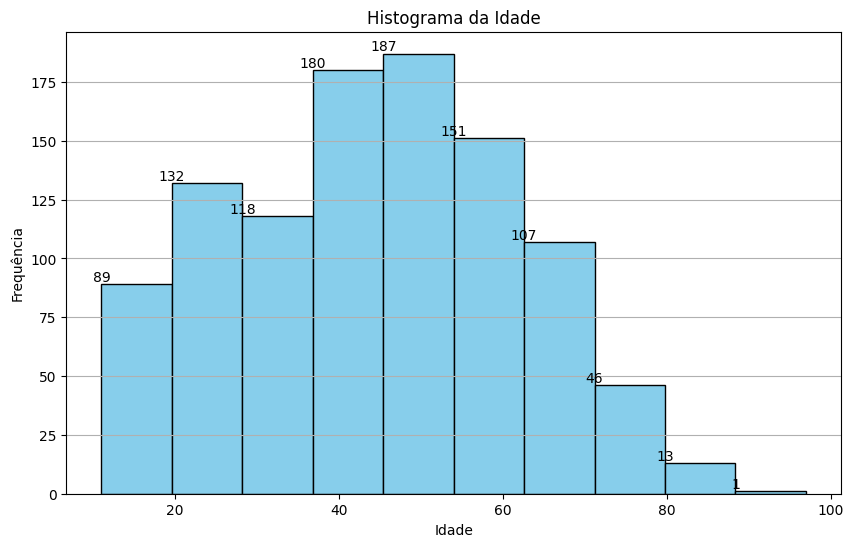

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o DataFrame com o delimitador correto
df = pd.read_csv('/content/membros_FINAL_cleaned.csv', delimiter=';')

# Remover espaços em branco nos nomes das colunas
df.columns = df.columns.str.strip()

# Plotando o histograma
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['IDADE'], bins=10, color='skyblue', edgecolor='black')

# Adicionando rótulos acima das barras
for count, x in zip(counts, bins):
    plt.text(x, count, str(int(count)), ha='center', va='bottom')

plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y')

plt.show()


Index(['Nome', 'NASC', 'IDADE', 'ESTADO_CIVIL', 'MODO_ENT', 'ENDERECO', 'EBD'], dtype='object')


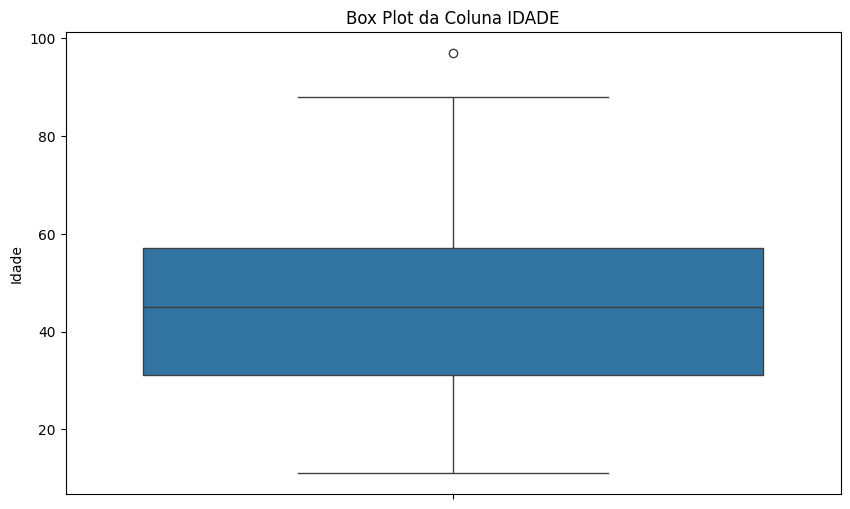

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo CSV com o delimitador correto
df_membros = pd.read_csv('membros_FINAL_cleaned.csv', delimiter=';')

# Verificar as colunas para garantir que foram carregadas corretamente
print(df_membros.columns)

# Plotar o boxplot para a coluna IDADE
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_membros, y='IDADE')
plt.title('Box Plot da Coluna IDADE')
plt.ylabel('Idade')

# Exibir o gráfico
plt.show()


In [205]:
import pandas as pd

# Carregar o arquivo CSV com o delimitador correto
df_membros = pd.read_csv('membros_FINAL_cleaned.csv', delimiter=';')

# Gerar um resumo estatístico para a coluna IDADE
resumo_estatistico = df_membros['IDADE'].describe()

# Exibir o resumo estatístico
print(resumo_estatistico)


count    1024.000000
mean       44.500000
std        17.230653
min        11.000000
25%        31.000000
50%        45.000000
75%        57.000000
max        97.000000
Name: IDADE, dtype: float64


In [206]:
import pandas as pd

# Carregar o arquivo CSV com o delimitador correto
df_membros = pd.read_csv('membros_FINAL_cleaned.csv', delimiter=';')

# Calcular a frequência simples (absoluta) da coluna IDADE
frequencia_simples = df_membros['IDADE'].value_counts().sort_index()

# Calcular a frequência relativa (percentual) da coluna IDADE
frequencia_relativa = df_membros['IDADE'].value_counts(normalize=True).sort_index() * 100

# Criar um DataFrame com a distribuição de frequências
distribuicao_frequencias = pd.DataFrame({
    'Frequência Simples': frequencia_simples,
    'Frequência Relativa (%)': frequencia_relativa
})

# Exibir a distribuição de frequências
print(distribuicao_frequencias)


       Frequência Simples  Frequência Relativa (%)
IDADE                                             
11.0                    4                 0.390625
12.0                    6                 0.585938
13.0                    9                 0.878906
14.0                   13                 1.269531
15.0                    8                 0.781250
...                   ...                      ...
83.0                    1                 0.097656
84.0                    1                 0.097656
85.0                    1                 0.097656
88.0                    1                 0.097656
97.0                    1                 0.097656

[77 rows x 2 columns]


In [207]:
import pandas as pd
import numpy as np

# Supondo que já temos o DataFrame df_membros carregado com a coluna IDADE

# Definir os intervalos de 10 em 10 anos
bins = np.arange(df_membros['IDADE'].min(), df_membros['IDADE'].max() + 10, 10)

# Criar a distribuição de frequências
freq_simples = pd.cut(df_membros['IDADE'], bins=bins).value_counts().sort_index()

# Criar a distribuição de frequências relativas
freq_relativa = freq_simples / len(df_membros) * 100

# Criar um DataFrame para visualizar as frequências
tabela_frequencia = pd.DataFrame({
    'Intervalo': freq_simples.index,
    'Frequência Simples': freq_simples.values,
    'Frequência Relativa (%)': freq_relativa.values
})

# Exibir a tabela
print(tabela_frequencia)


       Intervalo  Frequência Simples  Frequência Relativa (%)
0   (11.0, 21.0]                 119                 8.686131
1   (21.0, 31.0]                 145                10.583942
2   (31.0, 41.0]                 159                11.605839
3   (41.0, 51.0]                 229                16.715328
4   (51.0, 61.0]                 183                13.357664
5   (61.0, 71.0]                 125                 9.124088
6   (71.0, 81.0]                  54                 3.941606
7   (81.0, 91.0]                   5                 0.364964
8  (91.0, 101.0]                   1                 0.072993
